<h1>Определение перспективного тарифа для телеком компании<span class="tocSkip"></span></h1>

1. Предобработка данных  
    - 1.1  Изучение данных из файлов  
    - 1.2  Обработка пропусков  
    - 1.3  Обработка дубликатов  
    - 1.4  Замена типов данных  
    - 1.5  Объединение датасетов  


2. Исследовательский анализ данных  
    - 2.1  Анализ пользовательского поведения  
    - 2.2  Расчет среднего, дисперсии и стандартного отклонения  


3. Проверка гипотез  
    - 3.1  Гипотеза №1  
    - 3.2  Гипотеза №2  


4. Общий вывод

В нашем распоряжении условия тарифных планов и данные 500 клиентов, включая: идентификатор пользователя, возраст, город, имя, фамилию, дату регистрации, тариф, расходы по звонкам, сообщениям и интернет-трафику.  
  
**Задачи:**   

1.	Проанализировать поведение пользователей двух тарифных планов и на основе полученных данных выбрать наиболее перспективный тариф сотовой связи. 
  
  
2.	Проверить статистические гипотезы:


  -	о равенстве средних значений выручки по двум тарифам;
  -	о равенстве средних значений выручки по двум тарифам в Москве и регионах.


## Предобработка данных

### Изучение данных из файлов

In [1]:
import pandas as pd 
import numpy as np
import datetime as dt

import math
import random 
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
sns.set(rc={'figure.figsize':(12, 6)})

In [3]:
users.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
calls.head(2)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
messages.head(2)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
internet.head(2)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [11]:
tariffs.head(2)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Обработка пропусков

In [13]:
datasets = [users, calls, messages, internet, tariffs]

for dataset in datasets:
    display(dataset.isnull().sum().to_frame())

,0
user_id,0
age,0
churn_date,462
city,0
first_name,0
last_name,0
reg_date,0
tariff,0


,0
id,0
call_date,0
duration,0
user_id,0


,0
id,0
message_date,0
user_id,0


,0
id,0
mb_used,0
session_date,0
user_id,0


,0
messages_included,0
mb_per_month_included,0
minutes_included,0
rub_monthly_fee,0
rub_per_gb,0
rub_per_message,0
rub_per_minute,0
tariff_name,0


Пропущенные значения есть только в столбце churn_date датасета *users*, это дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), то есть наличие таких пропусков допустимо. 

### Обработка дубликатов

In [14]:
for dataset in datasets:
    dataset.drop_duplicates().reset_index(drop=True)
    print(dataset.duplicated().sum())

0
0
0
0
0


Дубликатов нет.

### Замена типов данных

Для того, чтобы получить данные по месяцам воспользуемся методом to_datetime() и превратим содержимое столбцов с call_date, message_date и session_date в понятные для Python даты.

In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%dT%H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%dT%H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%dT%H:%M:%S')

calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

### Объединение датасетов

Объединим датасеты users и tariffs.

In [16]:
tariffs.set_axis(['mes_included', 'mb_included', 'min_included', 'rub_monthly_fee', 
                  'rub_per_gb', 'rub_per_mes', 'rub_per_min', 'tariff'], axis="columns", inplace=True)

users_tariffs = users.merge(tariffs, on='tariff', how='left')
users_tariffs.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3


Посчитаем для каждого пользователя количество сделанных звонков по месяцам.  
Округлим значения в столбце duration в соответствии с требованием заказчика («Мегалайн» всегда округляет секунды до минут, каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута).

In [17]:
sp_minutes = calls.groupby(['user_id', 'month']).sum()
sp_minutes = sp_minutes.reset_index()
sp_minutes['duration'] = np.ceil(sp_minutes['duration'])
display(sp_minutes.head())

,user_id,month,duration
0,1000,5,151.00
1,1000,6,159.00
2,1000,7,319.00
3,1000,8,390.00
4,1000,9,441.00


Посчитаем для каждого пользователя количество израсходованных минут разговора по месяцам.

Объединим датасет sp_minutes с users_tariffs.

In [18]:
users_calls = users_tariffs.merge(sp_minutes, on='user_id', how='left')
users_calls.dropna(subset = ['duration', 'month'], inplace = True)
users_calls.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,duration
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.00,151.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.00,159.00


У нас уже есть данные для каждого пользователя по количеству сделанных звонков и израсходованных минут разговора по месяцам. Посчитаем помесячную выручку с каждого пользователя по звонкам.

In [19]:
def call_profit(row):
    included = row['min_included']
    dur = row['duration']
    rubmin = row['rub_per_min']
    if dur > included:
        delta = dur - included
    else:
        delta = 0
        
    prof = rubmin*(delta)
    return prof
    
users_calls['calls_profit'] = users_calls.apply(call_profit, axis=1)
users_calls.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,duration,calls_profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.00,151.00,0.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.00,159.00,0.00


In [20]:
users_calls = users_calls[['user_id', 'month', 'duration', 'calls_profit']]
users_calls.head()

,user_id,month,duration,calls_profit
0,1000,5.00,151.00,0.00
1,1000,6.00,159.00,0.00
2,1000,7.00,319.00,0.00
3,1000,8.00,390.00,0.00
4,1000,9.00,441.00,0.00


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам.  

In [21]:
sp_messages = messages.pivot_table(index = ('month', 'user_id'), values = 'message_date', aggfunc = 'count')
sp_messages = sp_messages.reset_index()
sp_messages.set_axis(['month', 'user_id', 'mes_count'], axis="columns", inplace=True)
sp_messages.sort_values(by='month').head()

,month,user_id,mes_count
0,1,1005,7
21,1,1337,7
22,1,1372,12
23,1,1373,28
24,1,1375,75


Объединим датасет sp_messages с users_tariffs.

In [22]:
users_messages = users_tariffs.merge(sp_messages, on='user_id', how='left')
users_messages.dropna(subset = ['month', 'mes_count'], inplace = True)
users_messages.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,mes_count
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.00,22.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.00,60.00


Посчитаем помесячную выручку с каждого пользователя по сообщениям, для этого необходимо вычесть бесплатный лимит из суммарного количества звонков, остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану.

In [23]:
def mess_profit(row):
    included = row['mes_included']
    mes = row['mes_count']
    rubmes = row['rub_per_mes']
    if mes > included:
        delta = mes - included
    else:
        delta = 0
        
    prof = rubmes*(delta)
    return prof
    
users_messages['mes_profit'] = users_messages.apply(mess_profit, axis=1)
users_messages.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,mes_count,mes_profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.00,22.00,0.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.00,60.00,0.00


In [24]:
users_messages = users_messages[['user_id', 'month', 'mes_count', 'mes_profit']]
users_messages.head()

,user_id,month,mes_count,mes_profit
0,1000,5.00,22.00,0.00
1,1000,6.00,60.00,0.00
2,1000,7.00,75.00,0.00
3,1000,8.00,81.00,0.00
4,1000,9.00,57.00,0.00


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.    
Округлим значения в соответствии с требованием заказчика («Мегалайн» всегда округляет мегабайты — до гигабайт. Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта).

In [25]:
sp_internet = internet.pivot_table(index = ('month', 'user_id'), values = 'mb_used', aggfunc = 'sum')
sp_internet = sp_internet.reset_index()
sp_internet.set_axis(['month', 'user_id', 'mb_sum'], axis="columns", inplace=True)
sp_internet.sort_values(by='month').head()

,month,user_id,mb_sum
0,1,1005,"2,727.97"
24,1,1337,"10,174.42"
25,1,1340,"2,207.26"
26,1,1372,"4,312.96"
27,1,1373,"9,173.74"


In [26]:
users_internet = users_tariffs.merge(sp_internet, on='user_id', how='inner')
users_internet.dropna(subset = ['month', 'mb_sum'], inplace = True)
users_internet['month'] = users_internet['month'].astype('int')
users_internet['mb_sum'] = users_internet['mb_sum'].astype('int')
users_internet.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,mb_sum
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,2253
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6,23233


Посчитаем помесячную выручку с каждого пользователя за интернет по месяцам.  
Т.к. «Мегалайн» считает перерасход трафика в гигабайтах, а у нас все данные в мегабайтах, то нам нужно перевести значения столбца mb_sum в гигабайты - разделить каждое значение на 1024. 

In [27]:
def internet_profit(row):
    mb_incl = row['mb_included']
    mb = row['mb_sum']
    rubgb = row['rub_per_gb']
    if mb > mb_incl:
        delta = mb - mb_incl
    else:
        delta = 0
        
    prof = rubgb*math.ceil((delta/1024))
    return prof
    
users_internet['inet_profit'] = users_internet.apply(internet_profit, axis=1)
users_internet.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,mb_sum,inet_profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5,2253,0
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6,23233,0


In [28]:
users_internet = users_internet[['user_id', 'month', 'mb_sum', 'inet_profit']]
users_internet.head()

,user_id,month,mb_sum,inet_profit
0,1000,5,2253,0
1,1000,6,23233,0
2,1000,7,14003,0
3,1000,8,14055,0
4,1000,9,14568,0


Соберем данные в один датафрейм.

In [29]:
users_1 = users_calls.merge(users_messages, on=['user_id', 'month'], how='outer')
users_2 = users_1.merge(users_internet, on=['user_id', 'month'], how='outer')
users_all = users_tariffs.merge(users_2, on='user_id', how='outer')
users_all.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,duration,calls_profit,mes_count,mes_profit,mb_sum,inet_profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.00,151.00,0.00,22.00,0.00,"2,253.00",0.00
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.00,159.00,0.00,60.00,0.00,"23,233.00",0.00


Проверим новый датафрейм на предмет пропущенных значений. 

In [30]:
users_all.isnull().sum().to_frame()

,0
user_id,0
age,0
churn_date,3027
city,0
first_name,0
last_name,0
reg_date,0
tariff,0
mes_included,0
mb_included,0


В основном пропуски образовались потому, что не все клиенты использовали все виды услуг (например, кто-то звонил, но не отправлял сообщения). Появление таких пропусков допустимо, заменим эти значения на 0. Также пропуски образовались в столбце month - это пользователи, которые отказались от тарифа в тот же месяц, в который его оформили. Таких пользователей всего двое, в дальнейшем мы можем их не учитывать.

In [31]:
users_all['duration'] = users_all['duration'].fillna(value=0)
users_all['calls_profit'] = users_all['calls_profit'].fillna(value=0)
users_all['mes_count'] = users_all['mes_count'].fillna(value=0)
users_all['mes_profit'] = users_all['mes_profit'].fillna(value=0)
users_all['mb_sum'] = users_all['mb_sum'].fillna(value=0)
users_all['inet_profit'] = users_all['inet_profit'].fillna(value=0)

users_all.dropna(subset = ['month'], inplace = True)

Посчитаем общую помесячную выручку с каждого пользователя, для этого необходимо вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану.

In [32]:
users_all['profit'] = users_all[['calls_profit',
                                 'mes_profit', 
                                 'inet_profit', 
                                 'rub_monthly_fee']].sum(axis=1)
users_all.head(2)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,mes_included,mb_included,min_included,rub_monthly_fee,rub_per_gb,rub_per_mes,rub_per_min,month,duration,calls_profit,mes_count,mes_profit,mb_sum,inet_profit,profit
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,5.00,151.00,0.00,22.00,0.00,"2,253.00",0.00,"1,950.00"
1,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,6.00,159.00,0.00,60.00,0.00,"23,233.00",0.00,"1,950.00"


**Вывод по разделу**  

Мы загрузили данные, проверили их на пропуски и дубликаты. В данных присутствуют звонки с нулевой продолжительностью, это не ошибка: нулями обозначены пропущенные звонки, удаление не требуется. Для удобства дальнейшей работы мы объединили датасеты, также теперь все столбцы имеют соответствующий своему значению тип данных.  

В этом разделе мы подсчитали для каждого пользователя по месяцам: количество звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика и выручку с каждого пользователя.

## Исследовательский анализ данных

### Анализ пользовательского поведения 

Проанализируем поведение пользователей. Посмотрим, сколько потрачено минут разговора, отправлено сообщений и какой объём интернет-трафика потребовался пользователям каждого тарифа в месяц. Посчитаем среднее количество, дисперсию и стандартное отклонение.

**Звонки**

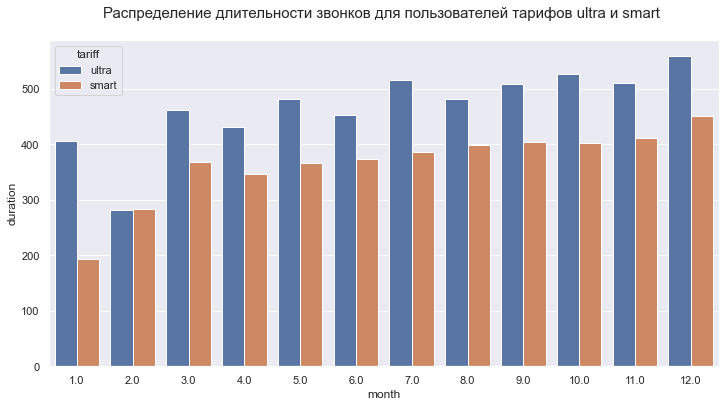

In [33]:
sns.barplot(x='month', y='duration', hue='tariff', ci=None, data=users_all)
plt.title('Распределение длительности звонков для пользователей тарифов ultra и smart \n', fontsize=15)
plt.show()

График показывает, что длительность звонков пользователей тарифа ultra больше, чем у пользователей тарифа smart. Наблюдается некоторое отклонение в феврале, можно считать его погрешностью на фоне двудих 11 месяцев. 

**Сообщения**

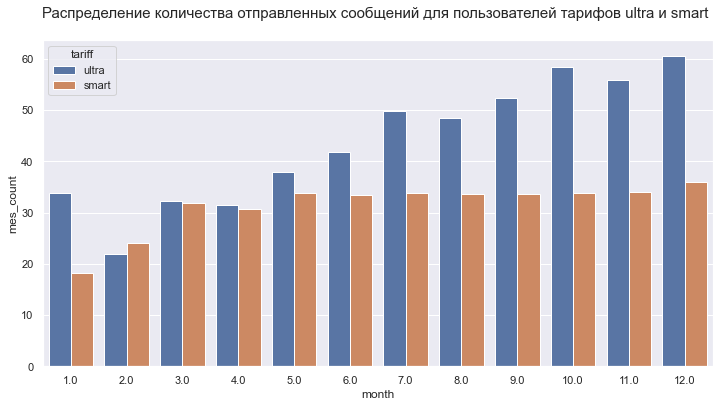

In [34]:
sns.barplot(x='month', y='mes_count', hue='tariff', ci=None, data=users_all)
plt.title('Распределение количества отправленных сообщений для пользователей тарифов ultra и smart \n', 
          fontsize=15)
plt.show()

Мы видим, что в начале года (до мая) ultra и smart по количеству отправленных сообщений идут практически вровень, а начиная с мая по количеству отправленных сообщений тариф ultra резко вырывается вперед. Интересно, что пользователи каждого тарифа отравляют в среднем очень мало смс, хотя в пакет ultra входит 1000 сообщений. 

**Интернет-трафик**

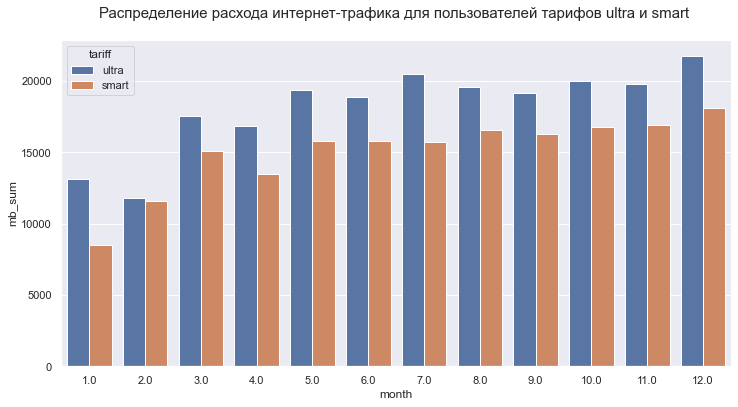

In [35]:
sns.barplot(x='month', y='mb_sum', hue='tariff', ci=None, data=users_all)
plt.title('Распределение расхода интернет-трафика для пользователей тарифов ultra и smart \n', 
          fontsize=15)
plt.show()

Как и на предыдущих графиках, мы видим, что ultra в начале года по расходованию интернет-трафика не отличается от тарифа smart, но начиная с марта уходит вперед по этому показателю. 

**Выручка**

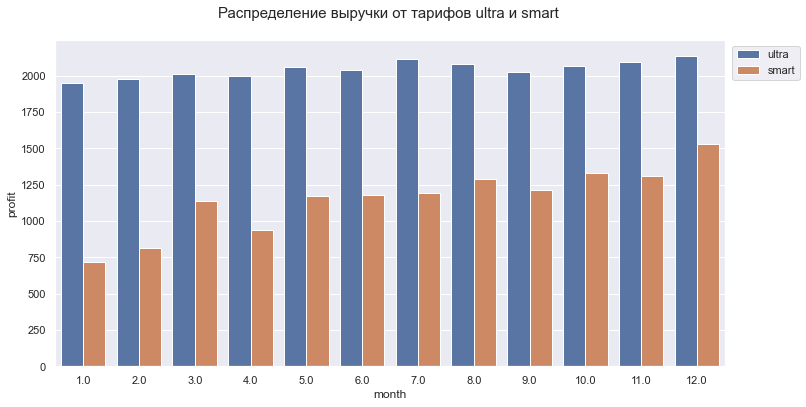

In [36]:
sns.barplot(x='month', y='profit', hue='tariff', ci=None, data=users_all)
plt.title('Распределение выручки от тарифов ultra и smart \n', 
          fontsize=15)
plt.legend(bbox_to_anchor=(1.12, 1))
plt.show()

Очевидно, что выручка на тарифе ultra больше, чем на тарифе smart. Это объяснимо тем, что в тариф smart включено меньше бесплатных минут, sms и mb, а значит пользователи smart раньше начинают платить сверх тарифного пакета. Также мы видим, что тариф smart под конец года по выручке начинает догонять ultra. 

### Расчет среднего, дисперсии и стандартного отклонения

**Продолжительность звонков**

In [37]:
calls_index = users_all.pivot_table(index='month', 
                                    columns='tariff', 
                                    values='duration', 
                                    aggfunc=('mean', 'var', 'std'))
calls_index.head(12)

mean           std              var           
tariff  smart  ultra  smart  ultra     smart      ultra
month                                                  
1.00   193.47 405.33 146.30 254.73 21,403.35  64,885.25
2.00   283.41 281.08 180.97 281.02 32,751.51  78,974.08
3.00   368.34 462.97 181.54 315.65 32,956.10  99,636.75
4.00   346.77 432.36 176.14 253.09 31,023.59  64,052.20
5.00   365.71 482.21 176.56 273.43 31,173.51  74,763.83
6.00   373.67 453.45 165.70 286.47 27,456.10  82,065.82
7.00   386.00 515.69 169.74 290.15 28,811.53  84,188.59
8.00   398.36 482.38 176.48 295.35 31,146.54  87,229.30
9.00   405.01 509.60 173.29 306.74 30,030.35  94,090.82
10.00  402.76 527.30 177.99 308.05 31,681.34  94,894.43
11.00  411.10 511.36 168.11 293.54 28,259.62  86,167.72
12.00  452.20 560.08 188.49 322.99 35,527.45 104,324.86

Мы рассчитали среднее значение, дисперсию и стандартное отклонение для продолжительности звонков.  
Для наглядности построим график стандартного отклонения длительности звонков по месяцам.  

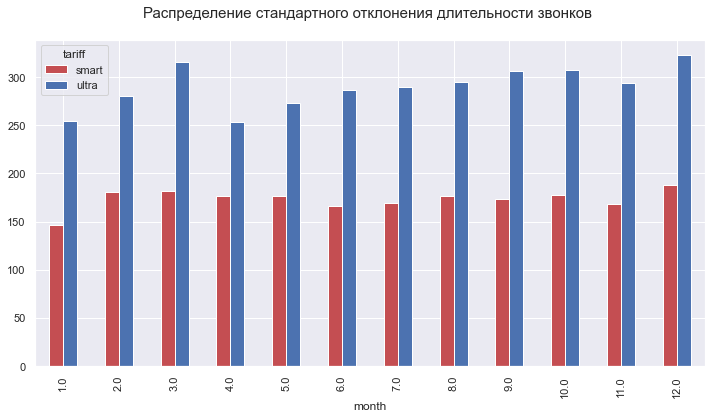

In [38]:
calls_std = users_all.pivot_table(index='month', columns='tariff', values='duration', aggfunc='std')
calls_std.plot(kind='bar', color=['r', 'b'])
plt.title('Распределение стандартного отклонения длительности звонков \n', 
          fontsize=15)
plt.show()

График показывает заметный разброс по продолжительности звонков у пользователей тарифа ultra, что логично (по предыдущим графикам мы видели, что пользователи ultra чаще звонят, чем пользователи smart). 

**Количество сообщений**

In [39]:
messages_index = users_all.pivot_table(index='month',
                                       columns='tariff', 
                                       values='mes_count', 
                                       aggfunc=('mean', 'var', 'std'))
messages_index.head(12)

mean         std          var         
tariff smart ultra smart ultra  smart    ultra
month                                         
1.00   18.24 33.78 16.20 30.67 262.37   940.69
2.00   24.09 21.96 21.75 26.77 473.10   716.82
3.00   31.86 32.30 26.80 41.62 718.49 1,732.38
4.00   30.74 31.56 24.54 37.51 602.14 1,407.29
5.00   33.77 37.85 27.04 40.31 730.99 1,624.64
6.00   33.40 41.73 28.40 44.57 806.81 1,986.30
7.00   33.75 49.85 28.28 48.70 799.89 2,372.04
8.00   33.64 48.44 28.95 46.60 838.26 2,171.74
9.00   33.64 52.29 28.12 46.40 790.62 2,152.86
10.00  33.77 58.43 28.57 51.93 816.11 2,697.18
11.00  34.08 55.79 28.39 49.77 805.94 2,476.95
12.00  35.99 60.61 30.58 51.79 934.95 2,681.98

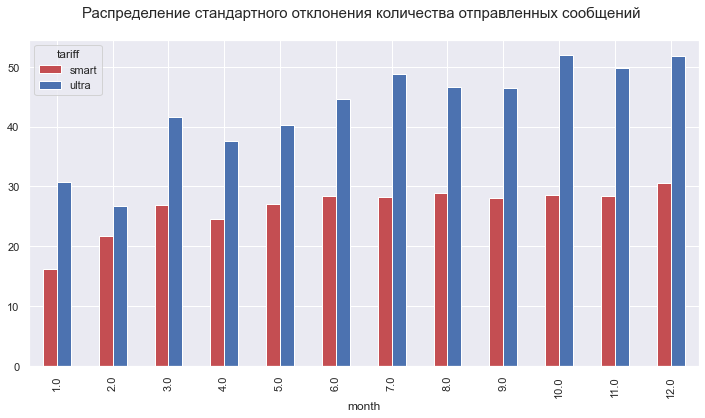

In [40]:
messages_std = users_all.pivot_table(index='month', columns='tariff', values='mes_count', aggfunc='std')
messages_std.plot(kind='bar', color=['r', 'b'])
plt.title('Распределение стандартного отклонения количества отправленных сообщений \n', 
          fontsize=15)
plt.show()

Также как и для звонков мы видим, что разброс количества сообщений по пользователям, разбитый по месяцам, намного сильнее на тарифе ultra, чем на тарифе smart. Что также объясняется более активным использованием услуги отправки sms сообщений на тарифе ultra. 

**Объем интернет-трафика**

In [41]:
internet_index = users_all.pivot_table(index='month',
                                       columns='tariff', 
                                       values='mb_sum', 
                                       aggfunc=('mean', 'var', 'std'))
internet_index.head(12)

mean                std                     var               
tariff     smart     ultra    smart     ultra         smart          ultra
month                                                                     
1.00    8,513.18 13,140.33 6,444.69  6,865.56 41,534,011.18  47,135,896.25
2.00   11,596.52 11,775.46 6,247.33 10,644.68 39,029,116.85 113,309,222.09
3.00   15,103.68 17,535.08 5,828.24 10,951.86 33,968,423.56 119,943,281.91
4.00   13,461.66 16,827.64 5,698.20  9,718.69 32,469,494.78  94,453,031.38
5.00   15,804.67 19,362.72 5,978.27 10,046.06 35,739,661.46 100,923,313.72
6.00   15,794.15 18,924.43 5,791.13  9,292.82 33,537,223.07  86,356,504.37
7.00   15,742.63 20,495.16 5,897.19 10,065.18 34,776,802.02 101,307,767.41
8.00   16,610.22 19,575.59 5,593.49 10,476.56 31,287,130.21 109,758,398.53
9.00   16,303.11 19,203.79 5,196.12  9,486.10 26,999,708.42  89,986,182.87
10.00  16,756.59 20,044.87 5,859.38  9,803.09 34,332,281.72  96,100,653.64
11.00  16,895.19 19,786.32 5,340.29  9,907.52 28,518,716.84  98,158,986.72
12.00  18,113.16 21,792.71 5,573.68 10,378.43 31,065,952.14 107,711,710.33

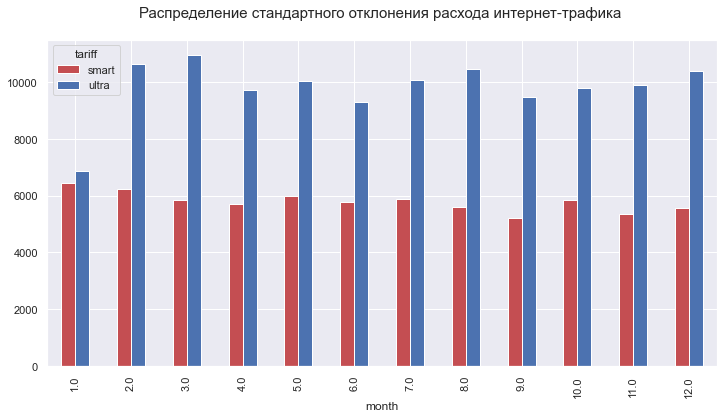

In [42]:
internet_std = users_all.pivot_table(index='month', 
                                     columns='tariff', 
                                     values='mb_sum', 
                                     aggfunc='std')
internet_std.plot(kind='bar', color=['r', 'b'])
plt.title('Распределение стандартного отклонения расхода интернет-трафика \n', 
          fontsize=15)
plt.show()

Как и во всех предыдущих случаях, мы видим сильный отрыв по тарифу ultra.  

Резюмируя, можно сказать, что пользователи активнее пользуются тарифом ultra и одновременно с этим видно, что выручка по данному тарифу тоже заметно выше, чем на тарифе smart.

**Вывод по разделу**  
  
- длительность звонков пользователей тарифа ultra больше, чем у пользователей тарифа smart. Наблюдается некоторое отклонение в феврале, можно считать его погрешностью на фоне двудих 11 месяцев;
- в начале года (до мая) ultra и smart по количеству отправленных сообщений идут практически вровень, после тариф ultra резко вырывается вперед. Пользователи каждого тарифа отравляют в среднем очень мало смс, хотя в пакет ultra входит 1000 сообщений;
- ultra в начале года по расходованию интернет-трафика не отличается от тарифа smart, но начиная с марта уходит вперед по этому показателю;
- выручка по тарифу ultra больше, чем по тарифу smart. Это объяснимо тем, что в тариф smart включено меньше бесплатных минут, sms и mb, а значит пользователи smart раньше начинают платить сверх тарифного пакета;
- тариф smart под конец года по выручке начинает догонять ultra.

В этом разделе мы рассчитали среднее значение, дисперсию и стандартное отклонение для ежемесячных расходов звонков, смс и трафика. Построили графики стандартного отклонения для этих услуг, получили следующие результаты:
- заметный разброс по продолжительности звонков у пользователей тарифа ultra;
- разброс количества сообщений по пользователям, намного сильнее на тарифе ultra, чем на тарифе smart;
- пользователи активнее пользуются тарифом ultra и одновременно с этим видно, что выручка по данному тарифу тоже заметно выше, чем на тарифе smart.

## Проверка гипотез

### Гипотеза №1

- средняя выручка пользователей тарифов ultra и smart различается.    

Создадим две выборки для последующего анализа.  

In [43]:
ultra = users_all.query('tariff == "ultra"')
smart = users_all.query('tariff == "smart"')

Гипотеза H₀: средние выручки тарифов smart и ultra равны друг другу.   
Гипотеза H₁: средние выручки тарифов smart и ultra не равны друг другу.

In [44]:
sample_1 = ultra['profit']
sample_2 = smart['profit']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(results.pvalue)

Отвергаем нулевую гипотезу
6.179723168444486e-274


H₀ всегда формулируется так, чтобы использовать знак равенства.   
В данном случае, если у нас средние выручки по тарифам smart и ultra за год равны друг другу, то данные не противоречат гипотезе. В обратном случае мы отвергаем нулевую гипотезу, что соответствует всем предыдущим данным по тарифам - действительно, ultra показывает ощутимо большую выручку за год, чем smart.  

Для проверки гипотез был использован t-тест (известный как тест Стьюдента).  
Этот тест используется, когда нужно сравнить средние значения двух независимых выборок по заданной переменной.

### Гипотеза №2

- средняя выручка по пользователям из Москвы отличается от выручки пользователей из других регионов  

Создадим две выборки для анализа. 

In [45]:
moscow = users_all.query('city == "Москва"')
regions = users_all.query('city != "Москва"')

Гипотеза H₀: средние значения выручки по Москве и по регионам равны друг другу.  
Гипотеза H₁: средние значения выручки по Москве и по регионам отличаются.

In [46]:
sample_1 = moscow['profit']
sample_2 = regions['profit']

alpha = 0.05

results = st.ttest_ind(sample_1, sample_2, equal_var = False)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(results.pvalue)

Не получилось отвергнуть нулевую гипотезу
0.46532858228722906


В данном случае мы видим, что выручка по регионам не отличается от выручки по Москве. Это вполне логично, так как Москва - это один многомиллионный столичный город, а регионы это совокупность городов с меньшим количеством жителей. 

Здесь мы также использовали тест Стьюдента для сравнения средних значений двух выборок.

**Вывод по разделу**  

Для сравнения средних значений двух выборок мы использовали тест Стьюдента.  
  
*Гипотеза №1:* средняя выручка пользователей тарифов ultra и smart различается.  
  
По результатам теста мы отвергли нулевую гипотезу о равенстве средней выручки по тарифам, тем самым подтвердив ранее полученные результаты (тариф ultra показывает ощутимо большую выручку за год, чем smart).  
  
*Гипотеза №2:* средняя выручка по пользователям из Москвы отличается от выручки пользователей из других регионов.

В данном случае нулевую гипотезу о равенстве средних значений выручки по Москве и по регионам равны отвегнуть не удалось. Средняя выручка по столице практически равна выручке по регионам. 

## Общий вывод

В рамках исследования мы проанализировали поведение клиентов «Мегалайн» (пользователей тарифов smart и ultra), подсчитали для каждого пользователя по месяцам: количество звонков и израсходованных минут разговора, количество отправленных сообщений, объем израсходованного интернет-трафика и выручку с каждого пользователя.

Мы выяснили, что длительность звонков, количество отправленных сообщений и объем использованного интернет-трафика по тарифу ultra больше, чем по тарифу smart. Выручка по тарифу ultra превышает выручку по тарифу smart. Мы предположили, что лидерство обусловлено тем, что в тариф smart включено меньше бесплатных минут, sms и mb. Также мы выявили, что тариф smart под конец года по выручке начинает догонять ultra. 

Изучив данные о количестве минут разговора, сообщений и объёме интернет-трафика используемых пользователями каждого тарифа ежемесячно, посчитали среднее количество, дисперсию и стандартное отклонение мы обнаружили большой разброс по продолжительности звонков у пользователей тарифа ultra, пользователи ultra звонят чаще, чем пользователи тарифа smart. Также как и для звонков разброс количества сообщений намного сильнее на тарифе ultra, чем на тарифе smart, что объясняется более активным использованием услуги отправки sms сообщений на тарифе ultra. 

Проверка гипотезы о различии средней выручки по тарифам подтвердила ранее полученные результаты (тариф ultra показывает ощутимо большую выручку за год, чем тариф smart). Проверка гипотезы о различии средних значений выручки по Москве и по регионам показала, что средняя выручка по столице практически равна средней выручке по регионам. 

Полученные выше результаты указывают на то, что ultra более перспективный тариф как для компании, так и для пользователей. 